<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> November 13, 2025 <strong> | Author:</strong> Adnan Alaref
</div>

# **Step 1: Import Library**

In [1]:
import os
import torch
import random
import torch.nn as nn
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from typing import Tuple,Dict,Any,List
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset

import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning)

# **Step 2: Prepare a Vocabulary.**

In [2]:
class Vocabulary:
  def __init__(self, sentences: List[str]) -> None:
    self.PAD_TOKEN = "<PAD>"
    self.UNK_TOKEN = "<UNK>"

    self.words = [self.PAD_TOKEN, self.UNK_TOKEN] + list(dict.fromkeys(" ".join(sentences).split()))
    self.word2idx = {w:i for i,w in enumerate(self.words)}
    self.idx2word = {i:w for w,i in self.word2idx.items()}

    # Store indices for convenience
    self.PAD_IDX = self.word2idx[self.PAD_TOKEN]
    self.UNK_IDX = self.word2idx[self.UNK_TOKEN]

  def __len__(self):
    return len(self.words)


  def sentence_to_indices(self,sentence)->List[int]:
    """Convert a sentence to list of indices
       Use .get() with fallback to UNK index
    """
    encoded = [self.word2idx.get(w, self.UNK_IDX) for w in sentence.split()]
    return encoded

  def save(self, path:str)->None:
    torch.save({
      'words':self.words,
      'word2idx':self.word2idx,
      'PAD_TOKEN': self.PAD_TOKEN,
      'UNK_TOKEN':self.UNK_TOKEN
    }, path)

  @classmethod
  def load(cls, path:str):
    data = torch.load(path)
    vocab = cls.__new__(cls)
    vocab.words = data['words']
    vocab.word2idx = data['word2idx']
    vocab.PAD_TOKEN = data['PAD_TOKEN']
    vocab.UNK_TOKEN = data['UNK_TOKEN']
    vocab.idx2word = {i:w for w, i in vocab.word2idx.items()}
    return vocab

  def input_output_pairs(self, sentences) ->Tuple[torch.Tensor, torch.Tensor]:
    """Create (X, y) training pairs from sentences"""
    X, y = [], []

    # Convert all sentences to indices
    Sequences = [self.sentence_to_indices(sent) for sent in sentences]

    # Create input-output pairs
    for seq in Sequences:
      for i in range(1, len(seq)):
        X.append(seq[:i]) # [0:i[
        y.append(seq[i])

    # Pad sequences
    X_tensor = pad_sequence([torch.tensor(x) for x in X], batch_first=True, padding_value=self.PAD_IDX)
    y_tensor = torch.tensor(y, dtype=torch.long)

    return X_tensor, y_tensor

## **Step 2.1: Prepare a small dataset**

In [3]:
# Example sentences
sentences = [
  "I love machine learning",
  "I love deep learning",
  "I enjoy coding in Python",
  "Python is great for AI",
]

vocab = Vocabulary(sentences)
print(f"Vocabulary size: {len(vocab)}")

Vocabulary size: 15


In [4]:
print(vocab.words)
print(vocab.word2idx)
print(vocab.idx2word)

['<PAD>', '<UNK>', 'I', 'love', 'machine', 'learning', 'deep', 'enjoy', 'coding', 'in', 'Python', 'is', 'great', 'for', 'AI']
{'<PAD>': 0, '<UNK>': 1, 'I': 2, 'love': 3, 'machine': 4, 'learning': 5, 'deep': 6, 'enjoy': 7, 'coding': 8, 'in': 9, 'Python': 10, 'is': 11, 'great': 12, 'for': 13, 'AI': 14}
{0: '<PAD>', 1: '<UNK>', 2: 'I', 3: 'love', 4: 'machine', 5: 'learning', 6: 'deep', 7: 'enjoy', 8: 'coding', 9: 'in', 10: 'Python', 11: 'is', 12: 'great', 13: 'for', 14: 'AI'}


In [5]:
X_tensor ,y_tensor = vocab.input_output_pairs(sentences)
print(f"X shape: {X_tensor.shape}, y shape: {y_tensor.shape}")

X shape: torch.Size([14, 4]), y shape: torch.Size([14])


In [6]:
PAD_Index = vocab.word2idx[vocab.PAD_TOKEN]
f"X_tensor : ", X_tensor, f"y_tensor : {y_tensor}", f"Pading Index : {PAD_Index}"

('X_tensor : ',
 tensor([[ 2,  0,  0,  0],
         [ 2,  3,  0,  0],
         [ 2,  3,  4,  0],
         [ 2,  0,  0,  0],
         [ 2,  3,  0,  0],
         [ 2,  3,  6,  0],
         [ 2,  0,  0,  0],
         [ 2,  7,  0,  0],
         [ 2,  7,  8,  0],
         [ 2,  7,  8,  9],
         [10,  0,  0,  0],
         [10, 11,  0,  0],
         [10, 11, 12,  0],
         [10, 11, 12, 13]]),
 'y_tensor : tensor([ 3,  4,  5,  3,  6,  5,  7,  8,  9, 10, 11, 12, 13, 14])',
 'Pading Index : 0')

In [7]:
path = r'/kaggle/working/vocab.pt'
vocab.save(path=path)

In [8]:
loaded_vocab = vocab.load(path)
print(loaded_vocab.words)
print(loaded_vocab.word2idx)
print(loaded_vocab.idx2word)

['<PAD>', '<UNK>', 'I', 'love', 'machine', 'learning', 'deep', 'enjoy', 'coding', 'in', 'Python', 'is', 'great', 'for', 'AI']
{'<PAD>': 0, '<UNK>': 1, 'I': 2, 'love': 3, 'machine': 4, 'learning': 5, 'deep': 6, 'enjoy': 7, 'coding': 8, 'in': 9, 'Python': 10, 'is': 11, 'great': 12, 'for': 13, 'AI': 14}
{0: '<PAD>', 1: '<UNK>', 2: 'I', 3: 'love', 4: 'machine', 5: 'learning', 6: 'deep', 7: 'enjoy', 8: 'coding', 9: 'in', 10: 'Python', 11: 'is', 12: 'great', 13: 'for', 14: 'AI'}


In [9]:
# Recreate vocabulary with UNK token
vocab_test = Vocabulary(sentences)

# Now test the same sentence that crashed before
test_sentence = "I love quantum computing"

try:
  indices = vocab_test.sentence_to_indices(test_sentence)
  print(f"✅ SUCCESS! Encoded as: {indices}")
  print(f"   Decoded: {' '.join(vocab_test.idx2word[idx] for idx in indices)}")
except KeyError as e:
  print(f"❌ Still broken: {e}")

✅ SUCCESS! Encoded as: [2, 3, 1, 1]
   Decoded: I love <UNK> <UNK>


# **Step 3: Create a Custom Dataset & DataLoader**

In [10]:
class WordDataset(Dataset):
  def __init__(self, inputs:torch.Tensor, targets:torch.Tensor, transform=None) -> None:
    super().__init__()  # optional, but recommended
    self.inputs = inputs
    self.targets = targets
    self.transform = transform

    # Validate shapes
    assert len(self.inputs)==len(self.targets) ,"Inputs and targets must have same length"

  def __len__(self):
    return len(self.targets) # same return len(self.inputs)

  @property
  def input_shape(self) ->torch.Size:
    """Returns the shape of a single input sample"""
    return self.inputs[0].shape

  @property
  def inputs_shape(self) ->torch.Size:
    """Returns the shape of the entire inputs tensor: [num_samples, ...]"""
    return self.inputs.shape

  @property
  def targets_shape(self) -> torch.Size:
    """Shape of target tensor"""
    return self.targets.shape

  @property
  def feature_dim(self) -> int:
    """Dimension of input features (for linear layers)"""
    return self.inputs.shape[-1] if self.inputs.dim() > 1 else 1

  @property
  def is_empty(self):
    """Checks if dataset is empty"""
    return len(self) == 0

  def __getitem__(self, index:int)->Tuple[torch.Tensor, torch.Tensor]:
    X, y = self.inputs[index], self.targets[index]

    if self.transform:
      X = self.transform(X)
    return X, y

  def shuffle(self, inplace=False):
    """
      Shuffle the dataset using torch.randperm (tensor-friendly)
    """
    indices = torch.randperm(len(self.inputs))
    shuffled_inputs = self.inputs[indices]
    shuffled_targets = self.targets[indices]

    if inplace:
      self.inputs = shuffled_inputs
      self.targets = shuffled_targets  # nothing returned, since data updated in place
    return shuffled_inputs, shuffled_targets

  @property
  def summary(self)-> Dict[str,Any]:
    length = [seq.size(0) if isinstance(seq,torch.Tensor) else len(seq) for seq in self.inputs]
    return {
      "num_samples": len(self),
      "max_len": max(length),
      "min_len": min(length)
    }

In [11]:
dataset = WordDataset(X_tensor,y_tensor)
dataloader = DataLoader(dataset=dataset,
                        batch_size=2, shuffle=True,
                        num_workers=2, pin_memory=True, # GPU optimization
                        persistent_workers=True,prefetch_factor=2)   # Performance

In [12]:
len(dataset), dataset.is_empty

(14, False)

In [13]:
dataset.input_shape, dataset.inputs_shape, dataset.targets_shape,  dataset.feature_dim

(torch.Size([4]), torch.Size([14, 4]), torch.Size([14]), 4)

In [14]:
dataset.summary , dataset.inputs , dataset.targets

({'num_samples': 14, 'max_len': 4, 'min_len': 4},
 tensor([[ 2,  0,  0,  0],
         [ 2,  3,  0,  0],
         [ 2,  3,  4,  0],
         [ 2,  0,  0,  0],
         [ 2,  3,  0,  0],
         [ 2,  3,  6,  0],
         [ 2,  0,  0,  0],
         [ 2,  7,  0,  0],
         [ 2,  7,  8,  0],
         [ 2,  7,  8,  9],
         [10,  0,  0,  0],
         [10, 11,  0,  0],
         [10, 11, 12,  0],
         [10, 11, 12, 13]]),
 tensor([ 3,  4,  5,  3,  6,  5,  7,  8,  9, 10, 11, 12, 13, 14]))

In [15]:
dataset.shuffle() # Note not make shuffle(inplace=True) for data, we will make shuffle in Dataloader

(tensor([[10, 11, 12,  0],
         [ 2,  0,  0,  0],
         [10, 11, 12, 13],
         [ 2,  7,  8,  0],
         [ 2,  7,  0,  0],
         [ 2,  3,  0,  0],
         [ 2,  3,  4,  0],
         [10,  0,  0,  0],
         [ 2,  0,  0,  0],
         [ 2,  0,  0,  0],
         [ 2,  3,  0,  0],
         [10, 11,  0,  0],
         [ 2,  3,  6,  0],
         [ 2,  7,  8,  9]]),
 tensor([13,  3, 14,  9,  8,  4,  5, 11,  3,  7,  6, 12,  5, 10]))

# **Step 4: Define the Model**

In [16]:
class NextWordPredictor(nn.Module):
  """LSTM-based Next Word Prediction Model.

    Args:
        vocab_size: Size of vocabulary
        embed_dim: Embedding dimension
        hidden_dim: LSTM hidden dimension
        pad_idx: Padding token index
        num_layers: Number of LSTM layers (default: 1)
        dropout: Dropout probability (default: 0.2)
  """
  def __init__(self,vocab_size, embed_dim, hidden_dim, pad_idx, num_layers, dropout) -> None:
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
    self.lstm = nn.LSTM(embed_dim,
                        hidden_dim,
                        batch_first=True,
                        num_layers=num_layers,
                        dropout=dropout if num_layers>1 else 0
                        )
    self.dropout = nn.Dropout(p=dropout)
    self.classifier = nn.Linear(in_features=hidden_dim, out_features=vocab_size)

  def forward(self, x:torch.Tensor)->torch.Tensor:
    # x shape: [batch_size, seq_len]
    x = self.embedding(x)   # [batch_size, seq_len, embed_dim]

    # LSTM returns: output, (hidden_state, cell_state)
    # output shape: [batch_size, seq_len, hidden_dim]
    out, (h,c) = self.lstm(x)

    # Get last hidden state and apply dropout
    last_hidden = out[:,-1,:]  # [batch_size, hidden_dim]
    last_hidden = self.dropout(last_hidden)

    # Final classification layer
    logits = self.classifier(last_hidden)  # [batch_size, vocab_size]

    # must return tensor need for summary if return tuple by using (e.g., F.log_softmax) not work
    return logits

# **Step 5: Setup Model, Loss & Optimizer**

In [17]:
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
# Instead of hardcoded values, use config
from dataclasses import dataclass

@dataclass
class ModelConfig:
  vocab_size:int = None
  embed_dim:int = 128
  hidden_dim:int = 256
  num_layers: int = 2
  dropout: float = 0.5
  pad_idx:int = None

  def __post_init__(self):
    if self.vocab_size is None:
      self.vocab_size = len(vocab)
    if self.pad_idx is None:
      self.pad_idx = vocab.word2idx[vocab.PAD_TOKEN]

@dataclass
class TrainingConfig:
    learning_rate: float = 1e-3
    batch_size: int = 2
    weight_decay: float = 1e-4
    max_grad_norm: float = 1.0
    epochs: int = 250
    checkpoint_path: str = r'/kaggle/working/checkpoints'
    save_every: int = 50    # save checkpoint every 50 epochs
    print_every: int = 10
    eta_min: float = 1e-5

config = ModelConfig()
train_cfg = TrainingConfig()

In [19]:
model = NextWordPredictor(**vars(config)).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=config.pad_idx, label_smoothing=0.1)
optimizer = torch.optim.AdamW(model.parameters(), lr=train_cfg.learning_rate, weight_decay=train_cfg.weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer=optimizer, T_max=train_cfg.epochs, eta_min=train_cfg.eta_min)

In [20]:
def save_checkpoint(model, optimizer, epoch, loss, config,path):
  checkpoint = {
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
    'config': vars(config)
  }
  os.makedirs(os.path.dirname(path), exist_ok=True)
  torch.save(checkpoint, path)
  print(f"Saved checkpoint: {path}")

In [21]:
! pip install torchinfo >/dev/null 2>&1

In [22]:
from torchinfo import summary
# Dummy integer input -> batch=32, seq_len=20
dummy_data = torch.randint(0, config.vocab_size, (32,20), dtype=torch.long)

# Summary
summary(model, input_data=dummy_data, device=device)

Layer (type:depth-idx)                   Output Shape              Param #
NextWordPredictor                        [32, 15]                  --
├─Embedding: 1-1                         [32, 20, 128]             1,920
├─LSTM: 1-2                              [32, 20, 256]             921,600
├─Dropout: 1-3                           [32, 256]                 --
├─Linear: 1-4                            [32, 15]                  3,855
Total params: 927,375
Trainable params: 927,375
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 590.01
Input size (MB): 0.01
Forward/backward pass size (MB): 1.97
Params size (MB): 3.71
Estimated Total Size (MB): 5.68

In [23]:
xx = torch.randint(0, config.vocab_size, (32,20), dtype=torch.long)
xx = xx.to(device, non_blocking=True)
logits = model(xx)
print(logits)
print("Logits shape:", logits.shape)
print("Number of trainable parameters:",sum(p.numel() for p in model.parameters() if p.requires_grad))

tensor([[-3.1213e-02, -3.8468e-02,  9.3836e-02, -3.4222e-02,  8.5356e-02,
         -7.7888e-02, -1.0316e-04,  1.2164e-02, -5.0349e-02, -3.8045e-02,
          2.3842e-02,  2.2525e-02,  5.4709e-02,  5.2457e-02,  3.5186e-02],
        [-2.5540e-02, -2.1501e-02,  6.3411e-02, -3.3029e-02,  4.0849e-02,
         -1.3822e-02,  8.1443e-02,  1.6196e-02, -4.7172e-02, -4.9734e-02,
          4.6982e-02,  6.3244e-02,  1.2350e-02, -3.5836e-02,  1.6932e-02],
        [ 7.7844e-03, -7.7978e-02,  3.4578e-02, -4.3730e-02,  4.2707e-02,
         -5.0812e-02,  3.8099e-02,  4.2976e-02, -2.0753e-02, -2.1313e-02,
          5.7592e-02,  1.0323e-02,  2.9485e-02,  6.9678e-02, -3.1135e-03],
        [-4.3750e-02, -1.2128e-01,  1.0805e-02,  3.2038e-02,  4.0188e-02,
         -4.0559e-02,  2.5345e-02,  6.1045e-02, -3.9192e-02, -3.5969e-02,
         -4.2659e-03,  5.6440e-02,  6.8481e-02,  5.3268e-02, -4.0725e-02],
        [-3.9241e-02, -3.6038e-02,  1.8344e-02,  2.2052e-03,  9.7736e-02,
         -6.6191e-02, -2.2176e-02,

# **Step 6: Train the Model**

In [24]:
from torch.cuda.amp import autocast, GradScaler # PERFORMANCE OPTIMIZATIONS
scaler = GradScaler()  # helps scale gradients safely

train_losses = []
lr_history = []
for epoch in tqdm(iterable=range(train_cfg.epochs), desc="Traning Model"):
  model.train()
  total_loss = 0.0
  for inputs, targets in dataloader:
    inputs = inputs.to(device, non_blocking=True)
    targets = targets.to(device, non_blocking=True)

    optimizer.zero_grad(set_to_none=True) # faster & safer

    # Forward and loss in mixed precision
    with autocast():
      logits = model(inputs)
      loss = criterion(logits, targets)


    # Backward with scaled loss
    scaler.scale(loss).backward()

    # Unscale before gradient clipping (IN-PLAC)
    scaler.unscale_(optimizer)
    grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=train_cfg.max_grad_norm)

    # Optimizer step (only if gradients are valid)
    scaler.step(optimizer)
    scaler.update()

    # Step the scheduler
    scheduler.step()
    total_loss +=loss.item()

  # per-sample average loss for the epoch
  avg_loss = total_loss/len(dataloader)
  train_losses.append(avg_loss)

  # Track **learning rate per epoch** (take first param group)
  lr_history.append(optimizer.param_groups[0]['lr'])

  if (epoch+1)% train_cfg.save_every==0:
    save_checkpoint(model, optimizer, epoch, avg_loss, config, os.path.join(train_cfg.checkpoint_path,f"checkpoint_epoch_{epoch+1}.pt"))

  if (epoch+1)%train_cfg.print_every == 0:
    print(f"Epoch: [{epoch+1:3d}] | Train Loss: {avg_loss:.4f} | Gradient Norm: {grad_norm:.4f}")

Traning Model:   0%|          | 0/250 [00:00<?, ?it/s]

Epoch: [ 10] | Train Loss: 1.6020 | Gradient Norm: 8.5738
Epoch: [ 20] | Train Loss: 1.1528 | Gradient Norm: 2.9481
Epoch: [ 30] | Train Loss: 1.1039 | Gradient Norm: 3.5997
Epoch: [ 40] | Train Loss: 0.9533 | Gradient Norm: 1.8846
Saved checkpoint: /kaggle/working/checkpoints/checkpoint_epoch_50.pt
Epoch: [ 50] | Train Loss: 0.9280 | Gradient Norm: 2.3595
Epoch: [ 60] | Train Loss: 0.9581 | Gradient Norm: 1.4341
Epoch: [ 70] | Train Loss: 0.8748 | Gradient Norm: 0.9916
Epoch: [ 80] | Train Loss: 0.7830 | Gradient Norm: 0.7778
Epoch: [ 90] | Train Loss: 0.8390 | Gradient Norm: 0.5316
Saved checkpoint: /kaggle/working/checkpoints/checkpoint_epoch_100.pt
Epoch: [100] | Train Loss: 0.8131 | Gradient Norm: 0.8144
Epoch: [110] | Train Loss: 0.7978 | Gradient Norm: 2.8374
Epoch: [120] | Train Loss: 0.8247 | Gradient Norm: 0.6142
Epoch: [130] | Train Loss: 0.8687 | Gradient Norm: 0.3316
Epoch: [140] | Train Loss: 0.8266 | Gradient Norm: 2.2948
Saved checkpoint: /kaggle/working/checkpoints/che

# **Step 7: Evaluate The Model.**

In [25]:
def predict_next_word(model, vocab, sequence, device, top_k=1):
  model.eval()
  seq_idx = [vocab.word2idx.get(w, vocab.UNK_IDX) for w in sequence]
  X_input = torch.tensor([seq_idx], dtype=torch.long).to(device)

  with torch.inference_mode():
    logits = model(X_input)
    probs = torch.softmax(logits, dim=1)

  if top_k==1:
    pred_idx = torch.argmax(probs, dim=1).item()
    return vocab.idx2word[pred_idx]
  else:
    topk_idx = torch.topk(probs, k=top_k, dim=1).indices[0].tolist()
    return [vocab.idx2word[idx] for idx in topk_idx]

## **Step 7.1: Example usage**

In [26]:
Seq_test =  ["I", "love", "machine"]
print("Next word:", predict_next_word(model, vocab, Seq_test, device))
print("Top 5 predictions:", predict_next_word(model, vocab, Seq_test, device, top_k=5))

Next word: learning
Top 5 predictions: ['learning', 'machine', 'deep', 'Python', 'love']


In [27]:
Seq_test =  ["I", "love", "Quantum"]
print("Next word:", predict_next_word(model, vocab, Seq_test, device))
print("Top 3 predictions:", predict_next_word(model, vocab, Seq_test, device, top_k=3))

Next word: deep
Top 3 predictions: ['deep', 'machine', 'learning']


# **Step 8: Visualize The Trainign Loss and Learning Rate.**

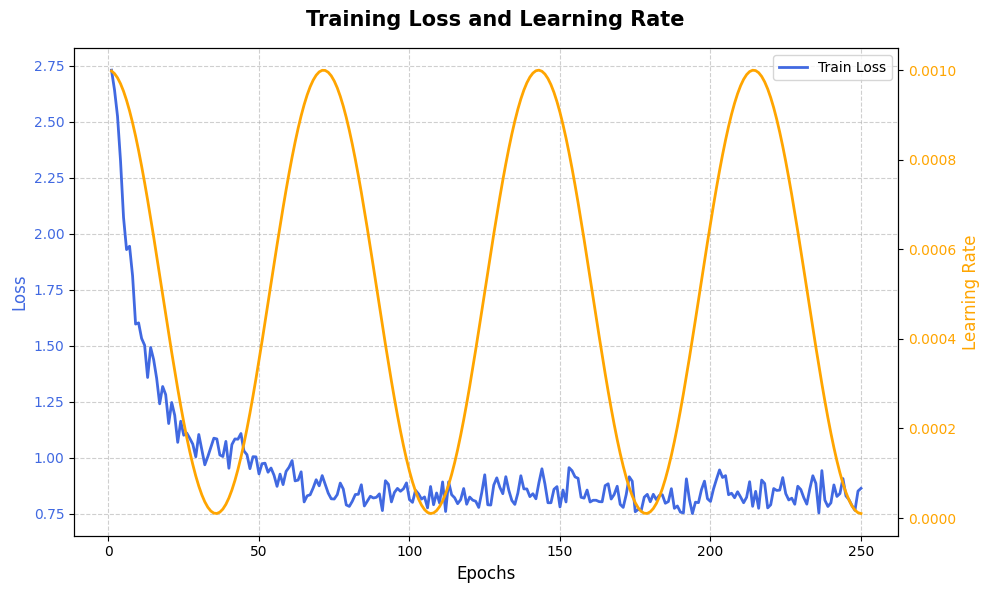

In [28]:
# Ensure data is aligned
epochs = list(range(1, len(train_losses)+1))
fig , ax1 = plt.subplots(figsize=(10,6), dpi=100)

# Train Loss
plt.plot(epochs, train_losses, color='royalblue', linewidth=2, label="Train Loss")
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_ylabel("Loss", color = 'royalblue', fontsize = 12)
ax1.set_xlabel("Epochs", fontsize=12)
ax1.legend(loc='best')

# Learning Rate
ax2 = ax1.twinx()
ax2.plot(epochs, lr_history, color='orange', linewidth=2, label="Learning Rate")
ax2.set_ylabel("Learning Rate", color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle("Training Loss and Learning Rate", fontsize=15, fontweight='bold')
fig.tight_layout()
plt.show()

<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>